<a href="https://colab.research.google.com/github/alexandergribenchenko/Pycaret_Exploration/blob/main/Acamica_PY_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 04 - Informe final de carrera**

### (Acámica - DS online 40 - Proyecto 04 - Alexander Ortega)

**Nota introductoria para la ejecución del notebook:** El presente notebook fue desarrollado empleando Google Colab y se recomienda, con el fin de obtener una correcta visualización de la totalidad de las gráficas y salidas del notebook, que este sea ejecutado de principio a fin en dicho entorno. Existen algunas gráficas interactivas que el paquete PyCaret genera que no se pueden visualizar en la vista previa del notebook desplegada en el repositorio de github, y que se sólo pueden verse al generar su ejecución.

# **01. Alcance y objeto del proyecto**


Si bien es clara la importancia de haber generado en los anteriores proyectos una implementación gradual (paso a paso) de los modelos de predicción, pues esto nos permitió tener un mayor conocimiento de las implicaciones y beneficios de cada una de las etapas de modelado, este proceso puede tomar un tiempo significativo que en contexto laboral puede dificultar su implementación. 

Es por ello que en este último proyecto nuestra finalidad es explorar una herramienta que nos permita generar de manera automatizada evaluaciones para un conjunto amplio de modelos, conociendo con ello de manera ágil los resultados para algunos caminos exploratorios, que después si así lo quisiéramos podríamos afinar. Así pues, la finalidad del presente proyecto no es mejorar de antemano las métricas obtenidas para un modelo en específico ni describir en detalle su funcionamiento,  sino explorar una herramienta que nos permita hacer de manera automatizada un conjunto de pruebas analíticas mucho más amplio y en un menor tiempo.

La librería empleada para hacer dicha automatización es [PyCaret](https://pycaret.org/) y el contexto del problema analitico bajo el cual se explorará la herramienta será el abordado en el Proyecto_02 que consistió en la evaluación de un conjunto de modelos de predicción de precios para inmuebles de la Ciudad de Buenos Aires entre 2019 y enero de 2020.

El actual proyecto abordará de manera conjunta a partir de la librería Pycaret no únicamente el problema de la generación de modelos de regresión de aprendizaje supervisado para la estimación de precio de los inmuebles, sino que también complementaremos su alcance con la evaluación de modelos de clustereizacion ampliando así además los resultados de los anteriores proyectos. 


# **02. Presentación de la herramienta central del proyecto (PyCaret)**

Tal como está descrito en su [página oficial](https://pycaret.org/guide/), PyCaret es una librería de aprendizaje automático de código abierto en Python que tiene como objetivo reducir el tiempo empleado desde la formulación de las hipótesis hasta la obtención de resultados en diversos contextos analiticos. 

Si bien la herramienta se sugiere como de uso para todo tipo de público, enfatizamos de manera particular en la recomendación que generan para científicos de datos experimentados que desean aumentar la productividad en los experimentos de aprendizaje automático mediante el uso de PyCaret en sus flujos de trabajo, dado que conocen el contexto de la herramienta que y pueden evaluar y enfocar con mayor criterio los resultados y funcionalidades que las herramienta entrega. 

Es importante destacar también que la implementación presentada en este proyecto tomó como referentes los  [tutoriales oficiales](https://pycaret.readthedocs.io/en/latest/tutorials.html#regression) para problemas de regresión y clusterización que PyCaret comparte en su portal.

# **03.Instalación y carga de las librerías a emplear**

In [1]:
#!pip install --upgrade scikit-learn

In [2]:
!pip install --upgrade xgboost

Requirement already up-to-date: xgboost in /usr/local/lib/python3.7/dist-packages (1.4.2)


In [3]:
!pip install --upgrade catboost

Requirement already up-to-date: catboost in /usr/local/lib/python3.7/dist-packages (0.26)


In [4]:
!pip install --upgrade numpy

  Using cached https://files.pythonhosted.org/packages/3f/03/c3526fb4e79a793498829ca570f2f868204ad9a8040afcd72d82a8f121db/numpy-1.21.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
ERROR: yellowbrick 1.3.post1 has requirement numpy<1.20,>=1.16.0, but you'll have numpy 1.21.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.0 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement pandas>=1.2.0, but you'll have pandas 1.1.5 which is incompatible.
ERROR: pycaret 2.3.2 has requirement numpy==1.19.5, but you'll have numpy 1.21.0 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: pandas-profiling 3.0.0 has requirement requests>=2.24.0, but you'll have requests 2.23.0 which is incompatible.
ERROR: pandas-profiling 3.0.0 has requirement tqdm>=4.48.2, but you'll have tqdm 4.41.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement f

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time

In [6]:
!pip install pycaret

  Using cached https://files.pythonhosted.org/packages/08/d6/a6aaa29fea945bc6c61d11f6e0697b325ff7446de5ffd62c2fa02f627048/numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement pandas>=1.2.0, but you'll have pandas 1.1.5 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: pandas-profiling 3.0.0 has requirement requests>=2.24.0, but you'll have requests 2.23.0 which is incompatible.
ERROR: pandas-profiling 3.0.0 has requirement tqdm>=4.48.2, but you'll have tqdm 4.41.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.21.0
    Uninstalling 

In [7]:
from pycaret.utils import enable_colab
enable_colab()

from pycaret.utils import version
version()

Colab mode enabled.


'2.3.2'

# **04.Preparación del Dataset de Análisis**

El dataset base que emplearemos para explorar las herramientas de la libreria PyCaret tanto en los problemas de regresión como el los de clustering corresponde con un dataset ‘curado’ que hemos obtenido del [Proyecto_02](https://github.com/alexandergribenchenko/Acamica_Proyecto_02/blob/main/DS_Proyecto_02_Entregado.ipynb). Aunque la finalidad del presente proyecto no es obtener de antemano mejores resultados en las métricas de los modelos que los presentados en el proyecto descrito, si resulta útil que pueda existir una secuencia comparativa en el desarrollo de los modelos a partir de un set de datos similar pues esto nos permitirá tener una idea de los resultados que se pueden tener con una implementación automatizada. 

En este proyecto no nos detendremos en un detallado análisis exploratorio de datos para describir el origen del dataset, que puede visualizarse en detalle en el [Proyecto_02](https://github.com/alexandergribenchenko/Acamica_Proyecto_02/blob/main/DS_Proyecto_02_Entregado.ipynb). Simplemente destacamos que es un dataset que en el que se ha hecho de antemano eliminación de outliers bajo criterios de análisis específicos, y que cuenta con los mismos registros tanto en cantidad como en índice que los empleados para entrenar y generar los modelos en el Proyecto_02.  Sin embargo no se han desarrollado sobre el transformaciones de escalado, imputación o encoding, pues la idea es explotar las funcionalidades de PyCaret en este aspecto. 

En detalle el dataset curado obtenido como parte del proyecto_02, y que emplearemos  en las etapas de regresión y clustering con PyCaret es el siguiente:

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
path_data = '/content/drive/MyDrive/Colab Notebooks/00_Acamica/PY_04_Acamica/'

In [10]:
df = pd.read_csv(path_data+'df_base_PY_04.csv', sep =',')
df

,l3,property_type,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Boedo,PH,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0
1,Palermo,PH,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0
2,Palermo,PH,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0
3,Villa Crespo,PH,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0
4,Villa Crespo,PH,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0
...,...,...,...,...,...,...,...,...,...,...
67863,Palermo,Departamento,-34.587152,-58.437724,3.0,2.0,2.0,120.0,82.0,430000.0
67864,Palermo,Departamento,-34.581425,-58.442707,3.0,2.0,2.0,88.0,82.0,399000.0
67865,Palermo,PH,-34.576573,-58.434394,3.0,2.0,1.0,84.0,84.0,178000.0
67866,Palermo,PH,-34.585355,-58.427194,3.0,2.0,2.0,144.0,134.0,480000.0


Con el fin de contar con un set de entrenamiento y uno de prueba generamos de manera manual un split de los datos. No será necesario hacer uso del train-test-split de ScikitLearn pues con PyCaret podremos trabajar en un mismo dataset con los features de entrada y con el target como veremos más adelante. Así, los sets de entrenamiento y prueba serán los siguientes:

In [11]:
data = df.sample(frac=0.7, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Cantidad de muestras para el entrenamiento: ' + str(data.shape))
print('Cantidad de muestras para el test: ' + str(data_unseen.shape))

Cantidad de muestras para el entrenamiento: (47508, 10)
Cantidad de muestras para el test: (20360, 10)


# **05.Implementación de PyCaret en el contexto del aprendizaje supervisado (Regresión)**

## **05.01. Configurando el ambiente de trabajo en PyCaret (Regresión)**

La función `setup()` es la principal función de PyCaret y nos permite inicializar el entorno de trabajo creando un pipeline de transformación para preparar los datos para el modelado. Es por ello que debe se debe ejecutar antes que cualquier otra función al emplear PyCaret. Para hacer uso de la función `setup()` cargaremos de manera inicial la totalidad de las funciones y métodos con que cuenta la sección de regresión de la librería:

In [12]:
from pycaret.regression import *

La función `setup()` presenta mas de 50 parámetros que se pueden personalizar acorde a todos los tipos de transformación que se desean automatizar como parte del pipeline, sin embargo solamente dos de ellos son obligatorios: el dataframe de pandas que contiene la información  y la definición de la variable de target. En nuestro caso específico definiremos únicamente de manera adicional la inclusión de la característica numérica de la variable bathrooms que no estaba siendo reconocida de manera adecuada en la automatización. Los elementos restates PyCaret los tomará con sus valores asignados por defecto. Veamos pues los elementos que presenta PyCaret como posibilidad a ser incluidos como parte de su Pipeline:

In [13]:
pipeline = setup(data = data, target = 'price', numeric_features=['bathrooms'])

,Description,Value
0,session_id,5625
1,Target,price
2,Original Data,"(47508, 10)"
3,Missing Values,True
4,Numeric Features,7
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(33255, 66)"


Vemos que aunque muchos de los parámetros aparezcan por defecto con la configuración de False o None, podrían activarse y configurarse como parte del pipeline, destacando entre ellos las transformaciones de escalado, imputación, y encoding ya tratados en el Proyecto_02. Sin embargo con el fin de mantener el uso más simple de la librería emplearemos las restantes variables en sus valores por defecto, y evaluaremos qué resultados obtendremos bajo tal configuración.



## **05.02. Evaluando modelos en simultaneo (Regresión)**

Aunque la automatización del pipeline es ya de antemano una ventaja significativa, no es aún la etapa que mayor valor puede aportar en la automatización del modelado a través de PyCaret. La etapa que mayor valor puede aportar a mi criterio, es la automatización de la evaluación de un muy amplio conjunto de modelos respecto a las métricas más significativas que este problema presenta. En específico para los problemas de regresión PyCaret se pueden evaluar de manera automatizada 25 tipos de modelos de regresión diferentes respecto a sus métricas más comunes (MAE, MSE, RMSE, R2, RMSLE y MAPE ). A continuación se presentan los 25 modelos descritos para el caso de problemas de regresión:

In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


La función que permite hacer la comparación de los modelos se denomina `compare_models()`. De la misma manera que en la sección anterior, esta función cuenta con gran cantidad de parámetros, sin embargo en nuestro caso específico únicamente definiremos 2 y emplearemos las restantes configuraciones por defecto con el fin de mantener el uso más simple de la librería y evaluar qué resultados obtendremos bajo tal configuración. Los 2 parámetros que configuraremos son la cantidad de folds con que se evaluarán las métricas (llevándolas a 5 y no a 10 para optimizar tiempo) y la cantidad de modelos que se almacenarán tras la ejecución al hacer la selección del top 5 respecto a la métrica R2 (que es la métrica por defecto empleada en el caso de los problemas de regresión). Veamos los resultados para los modelos evaluados:

In [15]:
start_time = time.time()
best = compare_models(fold = 5 , n_select=5)
print("--- Tiempo de ejecución en minutos ---:", round((time.time() - start_time)/60,2))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.674752e+04,9.016954e+08,3.002667e+04,8.946000e-01,0.1564,0.0984,14.288
rf,Random Forest Regressor,1.758902e+04,9.047396e+08,3.007733e+04,8.942000e-01,0.1566,0.1032,13.472
xgboost,Extreme Gradient Boosting,2.264412e+04,1.107197e+09,3.327122e+04,8.706000e-01,0.1762,0.1325,11.138
catboost,CatBoost Regressor,2.373328e+04,1.162319e+09,3.408907e+04,8.641000e-01,0.1784,0.1381,7.856
lightgbm,Light Gradient Boosting Machine,2.509176e+04,1.278737e+09,3.575555e+04,8.505000e-01,0.1863,0.1458,0.424
dt,Decision Tree Regressor,2.142431e+04,1.607765e+09,4.009274e+04,8.120000e-01,0.2053,0.1235,0.256
gbr,Gradient Boosting Regressor,2.874004e+04,1.608566e+09,4.010360e+04,8.120000e-01,0.2070,0.1667,4.446
lr,Linear Regression,3.222885e+04,1.952946e+09,4.418223e+04,7.718000e-01,0.2374,0.1889,0.626
lasso,Lasso Regression,3.221995e+04,1.952611e+09,4.417838e+04,7.718000e-01,0.2362,0.1888,0.862
br,Bayesian Ridge,3.220976e+04,1.953342e+09,4.418661e+04,7.717000e-01,0.2364,0.1887,0.206


--- Tiempo de ejecución en minutos ---: 5.85


Podemos observar como la evaluación de estos más de 20 modelos se logró empleando una única línea, que si bien puede parametrizarse con un mayor grado de detalle, permite tener una imagen macro del resultado de un conjunto de modelos que de manera manuel nos llevaría un importante bloque de código. Esta es a mi criterio la mayor ventaja que presenta la librería, pues en muchos problemas no conocemos de antemano que modelo puede tener un mejor comportamiento y resulta útil una rápida mirada panorámica para saber qué caminos o modelos podemos ir a explorar con mayor detalle.
 
También es de destacar el tiempo de ejecución y los valores de las métricas logradas. Aunque esto por supuesto guarda una estricta dependencia con el tamaño y la calidad de la preparación del dataset, en nuestro caso específico comparado con los resultados del Proyecto_02 tiene valores de métricas bastante buenos (5 modelos top con un R2 superior a 0.8) aun para las configuraciones por defecto empleadas, más aún cuando la implementación y ejecución total del código de más de 20 modelos tomo menos de 5 minutos. Este es sin duda el eje central del actual proyecto y el espíritu de la libreria Pycaret. 

En nuestro caso específico mostramos a continuación los 5 mejores modelos encontrados respecto a la metrica de R2, así como también los hiper parámetros por defecto empleados: 

In [16]:
for model in best:
  print(model)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5625, verbose=0, warm_start=False)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=5625, verbose=0, warm_start=False)
XGBRegressor(base_score

## **05.03. Creación de los modelos**

En la presente sección instanciaremos y evaluaremos 3 de los 5 mejores modelos encontrados en la sección anterior a manera de ejemplo para evidenciar el procedimiento a seguir en PyCaret. Esto nos permitirá en secciones posteriores hacer procedimientos específicos con estos modelos ya instalados y evaluados. Es importante destacar que no es mandatorio haber hecho la evaluación de los modelos del numeral anterior para poder instanciar y evaluar los modelos como lo haremos en el presente numeral. La utilidad de desarrollar la evaluación en esta secuencia es que podemos conocer de antemano qué modelos presentan un mejor comportamiento acorde a nuestras necesidades específicas e instanciarlos para hacer procedimientos particulares con estos modelos elegidos.

En esta sección la función a presentar es `create_model()` que es la que permite entrenar y evalúar un modelo empleando validación cruzada a partir del parámetro `fold`. La salida nos permite observar los resultados de las métricas MAE, MSE, RMSE, R2, RMSLE y MAPE para cada valor de fold, así como los estadísticos representativos de las métricas para cada modelo.

Los modelos 3 modelos entre los 5 se eligieron de manera arbitraria con el fin único de ejemplificar su procedimiento, idéntico e independiente del modelo elegido. Los modelos con que presentaremos los ejemplos son: 

- Random Forest (rf)
- Extreme Gradient Boosting (xgboost) 
- Light Gradient Boosting Machine (lightgbm)


### **05.03.01. Random Forest**

In [17]:
start_time = time.time()
model_rf = create_model(best[0], fold=10)
print("--- Tiempo de ejecución en minutos ---:", round((time.time() - start_time)/60,2))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16282.7133,8.581131e+08,29293.5680,0.8982,0.1478,0.0918
1,16212.3772,8.805618e+08,29674.2623,0.8962,0.1552,0.0959
2,16494.2183,8.581013e+08,29293.3659,0.8954,0.1536,0.0969
3,15947.0236,8.378098e+08,28944.9441,0.9013,0.1653,0.1016
4,16037.7078,9.603372e+08,30989.3080,0.8934,0.1559,0.0935
5,16243.7889,8.535489e+08,29215.5594,0.9017,0.1495,0.0938
6,16121.3706,8.532595e+08,29210.6057,0.8983,0.1492,0.0925
7,16482.7523,8.628631e+08,29374.5311,0.9008,0.1483,0.0939
8,15945.8032,8.393466e+08,28971.4796,0.9022,0.1516,0.0938
9,16361.7136,8.441753e+08,29054.6948,0.9015,0.1600,0.1009


--- Tiempo de ejecución en minutos ---: 2.91


### **05.03.02. XGBoost**

In [18]:
start_time = time.time()
model_xgboost = create_model(best[2])
print("--- Tiempo de ejecución en minutos ---:", round((time.time() - start_time)/60,2))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22533.7012,1.080646e+09,32873.1875,0.8718,0.1682,0.1285
1,22539.6484,1.111002e+09,33331.6953,0.8690,0.1757,0.1327
2,22497.7012,1.047783e+09,32369.4707,0.8723,0.1730,0.1318
3,22528.2363,1.072327e+09,32746.4102,0.8736,0.1859,0.1399
4,23090.8613,1.231895e+09,35098.3633,0.8633,0.1795,0.1345
5,22288.6152,1.045017e+09,32326.7305,0.8796,0.1666,0.1284
6,22718.2441,1.153176e+09,33958.4414,0.8626,0.1745,0.1308
7,22719.1914,1.098909e+09,33149.8008,0.8736,0.1688,0.1288
8,22447.5234,1.095864e+09,33103.8398,0.8723,0.1718,0.1307
9,22616.0352,1.084566e+09,32932.7461,0.8734,0.1785,0.1361


--- Tiempo de ejecución en minutos ---: 2.41


### **05.03.03. LightGBM**

In [19]:
start_time = time.time()
model_lightgbm = create_model(best[4])
print("--- Tiempo de ejecución en minutos ---:", round((time.time() - start_time)/60,2))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24908.1664,1.262862e+09,35536.7674,0.8502,0.1794,0.1404
1,24810.4085,1.250747e+09,35365.9030,0.8525,0.1850,0.1446
2,24777.6612,1.217359e+09,34890.6702,0.8516,0.1838,0.1445
3,25136.3548,1.266509e+09,35588.0414,0.8507,0.1999,0.1562
4,25505.3600,1.422756e+09,37719.4416,0.8421,0.1929,0.1472
5,24971.8349,1.229125e+09,35058.8847,0.8584,0.1801,0.1433
6,25277.6354,1.332636e+09,36505.2828,0.8412,0.1860,0.1445
7,25308.0266,1.275955e+09,35720.5176,0.8533,0.1806,0.1429
8,24710.5607,1.242781e+09,35253.0923,0.8552,0.1820,0.1429
9,25208.1657,1.254053e+09,35412.6086,0.8536,0.1906,0.1503


--- Tiempo de ejecución en minutos ---: 0.07


In [20]:
model_lightgbm.get_params

<bound method LGBMModel.get_params of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5625, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

## **05.04. Optimización de hiperparámetros**

Otra de las etapas en las que resulta útil tener un procedimiento automatizado asistido que nos permita mejorar nuestros modelos es la optimización de hiperparámetros. Al instanciar los modelos con la función `create_model` los hiperparámetros  que se emplean son los que  el modelo tiene por defecto, que pueden ser mejorados a partir de búsquedas sobre un conjunto de hiperparámetros más amplio.

PyCaret emplea para esta labor específica la función `tune_model`. que se encarga de ajustar automáticamente los hiperparámetros de un modelo utilizando `Random Grid Search`, en un espacio de muestreo predefinido. La salida imprime una cuadrícula de puntuación que muestra MAE, MSE, RMSE, R2, RMSLE y MAPE para cada fold. Sin embargo existen diversos parámetros de que se pueden personalizar como parte de la función  `tune_model` de los cuales exploraremos 3: 
- La posibilidad de elegir la métrica respecto a la cual se hará la optimización. 
- La selección de la cantidad de iteraciones que desean evaluarse en el espacio muestral.
- La personalización del espacio muestral de hiperparametros sobre el que queremos que se haga la optimización.

Elegiremos de manera arbitraria el modelo Light Gradient Boosting Machine (lightgbm) para implementar el procedimiento de optimización. El procedimiento es completamente análogo para cualquier otro tipo de modelo. Solo se debe tener en cuenta que si se desea personalizar el espacio muestral, este debe presentar hiperparametros propios del modelo a optimizar.


### **05.04.01. Optimizacion por defecto (espacio muestral predefinido y configuraciones por defecto)**

In [21]:
start_time = time.time()
tuned_lightgbm_01 = tune_model(model_lightgbm)
print("--- Tiempo de ejecución en minutos ---:", round((time.time() - start_time)/60,2))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19998.0521,9.660428e+08,31081.2294,0.8854,0.1605,0.1155
1,19743.9890,9.919572e+08,31495.3516,0.8831,0.1665,0.1174
2,19861.1479,9.280103e+08,30463.2614,0.8869,0.1629,0.1175
3,19580.9227,9.334763e+08,30552.8442,0.8900,0.1779,0.1251
4,19860.1411,1.048707e+09,32383.7501,0.8836,0.1687,0.1181
5,19661.2336,9.426405e+08,30702.4508,0.8914,0.1597,0.1148
6,20062.3440,9.946622e+08,31538.2650,0.8815,0.1639,0.1165
7,20184.7190,9.856480e+08,31395.0314,0.8867,0.1604,0.1151
8,19234.1808,9.293927e+08,30485.9424,0.8917,0.1594,0.1131
9,19993.3631,9.549193e+08,30901.7684,0.8885,0.1710,0.1225


--- Tiempo de ejecución en minutos ---: 1.96


In [22]:
tuned_lightgbm_01.get_params

<bound method LGBMModel.get_params of LGBMRegressor(bagging_fraction=0.5, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=16, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=260, n_jobs=-1, num_leaves=150, objective=None,
              random_state=5625, reg_alpha=0.05, reg_lambda=0.001, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

### **05.04.02. Optimizacion con selección del número de iteraciones y de la métrica a optimizar**

In [23]:
start_time = time.time()
tuned_lightgbm_02 = tune_model(model_lightgbm,n_iter = 50, optimize = 'R2')
print("--- Tiempo de ejecución en minutos ---:", round((time.time() - start_time)/60,2))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17568.2423,8.592146e+08,29312.3624,0.8981,0.1484,0.1001
1,17337.3994,8.556604e+08,29251.6733,0.8991,0.1562,0.1037
2,17754.1569,8.481074e+08,29122.2834,0.8966,0.1528,0.1043
3,17309.9040,8.519956e+08,29188.9640,0.8996,0.1656,0.1086
4,17551.0561,9.516405e+08,30848.6715,0.8944,0.1557,0.1025
5,17231.8776,8.380438e+08,28948.9855,0.9035,0.1478,0.0996
6,17641.6500,8.844852e+08,29740.2957,0.8946,0.1514,0.1010
7,17609.6147,8.317084e+08,28839.3559,0.9044,0.1480,0.1010
8,16980.2254,8.393857e+08,28972.1539,0.9022,0.1496,0.0995
9,17312.3150,8.206504e+08,28646.9970,0.9042,0.1571,0.1060


--- Tiempo de ejecución en minutos ---: 6.2


In [24]:
tuned_lightgbm_02.get_params

<bound method LGBMModel.get_params of LGBMRegressor(bagging_fraction=0.5, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=6, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=200, n_jobs=-1, num_leaves=200, objective=None,
              random_state=5625, reg_alpha=0.05, reg_lambda=2, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

### **05.04.03. Optimizacion con personalización del espacio muestral de hiperparámetros**

In [25]:
# Espacio muestral de hiperparámetros personalizado
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
              }

In [26]:
start_time = time.time()
tuned_lightgbm_03 = tune_model(model_lightgbm, custom_grid = lgbm_params)
print("--- Tiempo de ejecución en minutos ---:", round((time.time() - start_time)/60,2))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20255.5664,9.663101e+08,31085.5292,0.8854,0.1583,0.1158
1,19987.9347,9.619085e+08,31014.6492,0.8866,0.1637,0.1187
2,20243.4694,9.327112e+08,30540.3208,0.8863,0.1622,0.1198
3,19831.7660,9.492552e+08,30809.9846,0.8881,0.1764,0.1256
4,20288.9943,1.071582e+09,32735.0286,0.8811,0.1675,0.1189
5,19954.7599,9.263688e+08,30436.3077,0.8933,0.1578,0.1163
6,20240.9834,1.004129e+09,31687.9945,0.8803,0.1629,0.1172
7,20435.0153,9.505147e+08,30830.4184,0.8907,0.1579,0.1165
8,19670.7225,9.378595e+08,30624.4923,0.8908,0.1588,0.1150
9,20244.5650,9.560056e+08,30919.3402,0.8884,0.1698,0.1238


--- Tiempo de ejecución en minutos ---: 0.85


In [27]:
tuned_lightgbm_03.get_params

<bound method LGBMModel.get_params of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=100,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=190, objective=None,
              random_state=5625, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

Podemos observar como la métrica evaluada R2 incrementó en los 3 casos ejemplos de optimización. Para ejemplificar las secciones restantes del documento emplearemos el modelo `tuned_lightgbm_02` que fue el que presentó el valor más alto en la métrica priorizada. 


## **05.05. Analisis gráfico de los resultados del modelo**

En la presente sección mostraremos las salidas gráficas automatizadas por PyCaret que nos permiten hacer un análisis del performance del modelo respecto a diferentes características: comportamiento de los residuales, feature importance, comportamiento de los errores. Cooks distance, etc. 

Las funciones por PyCaret para hacer esta optimización son `plot_model()` y `evaluate_model()`: la primera nos permite graficar un parámetro en específico acorde a la entrada que asignemos y la última nos permite tener una salida interactiva con todas las posibles gráficas para el modelo evaluado.

### **05.05.01. Comportamiento de Residuales (Gráfica asignada por defecto en problemas de regresión)**

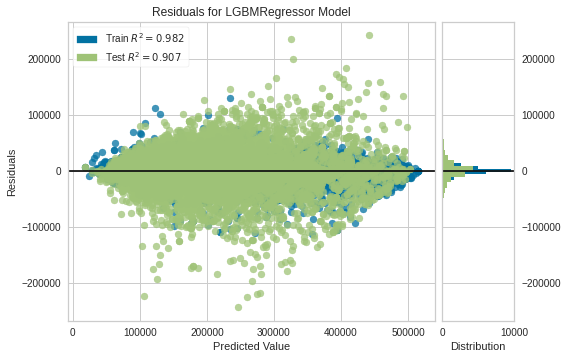

In [28]:
plot_model(tuned_lightgbm_02)

### **05.05.02. Comportamiento de Errores**

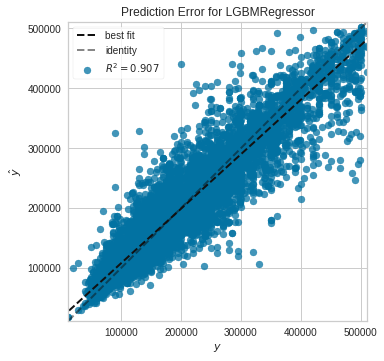

In [29]:
plot_model(tuned_lightgbm_02, plot = 'error')

### **05.05.03. Feature Importance**

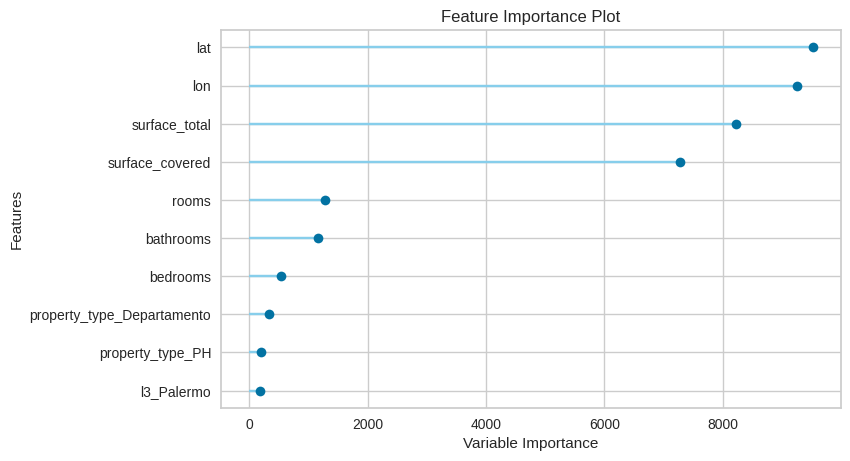

In [30]:
plot_model(tuned_lightgbm_02, plot='feature')

### **05.05.04. Hyperparametros (Tabular)**

In [31]:
plot_model(tuned_lightgbm_02, plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.2
max_depth,-1
min_child_samples,6
min_child_weight,0.001
min_split_gain,0.4
n_estimators,200


### **05.05.05. Salida interactiva con la totalidad de los graficos posibles**

In [32]:
evaluate_model(tuned_lightgbm_02)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…